<a href="https://colab.research.google.com/github/sati99/NLP_SpamClassifier/blob/master/SpamClassification_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     Spam Classifier using NLP
     dataset:(https://www.kaggle.com/uciml/sms-spam-collection-dataset)

    Steps:
    1.EDA
    2.VISUALIZATION
    3.PREPROCESSING
    4.FEATURE EXTRACTION
    5.CLASSIFICAION 

imported pandas to load data,numpy to perform mathematical operations on test-train, matplot and word cloud for visualization and inline to draw static images in the notebook

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading the data

In [0]:
mails= pd.read_csv('spam.csv',encoding='latin-1')
mails.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Combining the columns:
the ham and spam can be converted into 'label' where ham=0 ans spam=1 and column v2 as message.We do not require the columns ‘Unnamed: 2’, ‘Unnamed: 3’ and ‘Unnamed: 4’, so we remove them as they are mostly nan values


In [0]:
mails.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [0]:
mails.shape

(5572, 5)

In [0]:
mails.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
mails.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
mails.rename(columns={'v1':'labels','v2': 'message'},inplace=True)
mails.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
mails['labels'].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [0]:
mails['label']= mails['labels'].map({'ham':0,'spam':1})


In [0]:
mails.drop(['labels'], axis = 1, inplace = True)
mails.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [0]:
mails.isnull().sum() #checking for any missing values

message    0
label      0
dtype: int64

In [0]:
mails.shape

(5572, 2)

Visualization:

(https://www.geeksforgeeks.org/generating-word-cloud-python/)

    WordClouds: lots of words in different sizes, which represent the frequency or the importance of each word. 

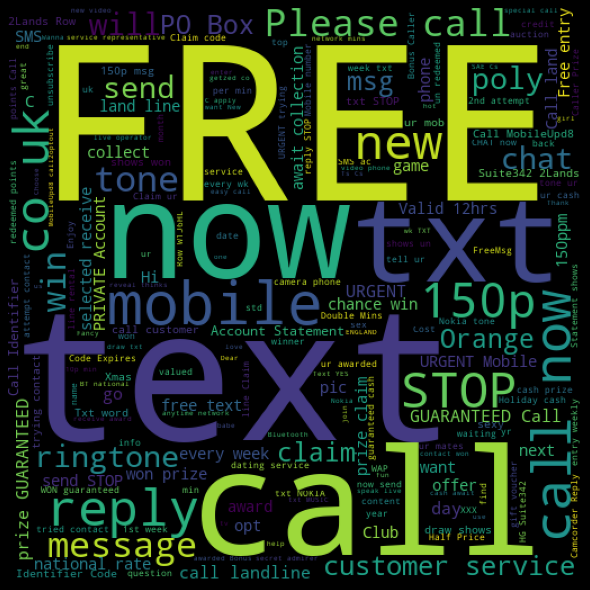

In [0]:
spam_words = ' '.join(list(mails[mails['label'] == 1]['message']))
spam_wordcloud= WordCloud(width = 512,height = 512).generate(spam_words)
#plotting the wordcloud
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()
#messages mostly contain the words like ‘FREE’, ‘call’, ‘text’....

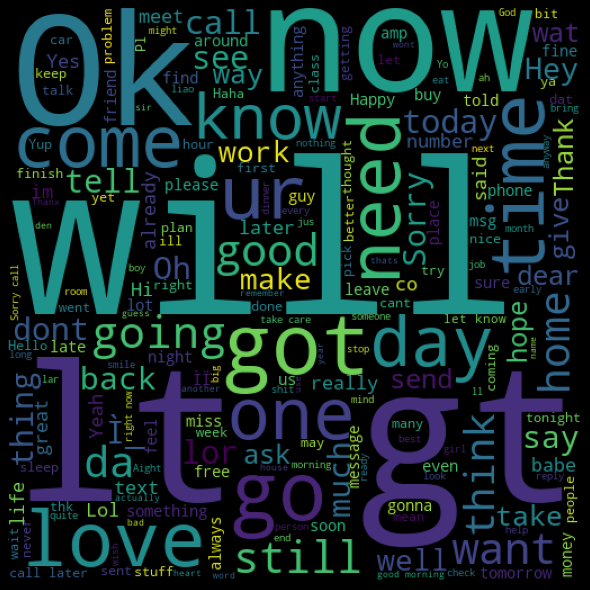

In [0]:
ham_words = ' '.join(list(mails[mails['label'] == 0]['message']))
ham_wordcloud = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()
#messages mostly contain the words like ‘OK’, ‘will’, ‘now’, ‘come’, ‘love'.....

Data Cleaning & Preparing 

1.LowerCasing
2.Removing stopwords
3.Stemming
4.N_gram language model

In [0]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk import ngrams

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


lower_casing: as 'Free' and 'free' are similar
stemming: reducing inflected words to their word stem in 'go' and 'going'
tokenization: breaking words into tokens for better cleaning
stopwords: a/an/the...
Ngram: a contiguous sequence of n items from a given sample of text or speech. 

In [0]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(mails)):
    review = re.sub('[^a-zA-Z]', ' ', mails['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Classification: Tf-idf 
 Probability of each word is counted as:
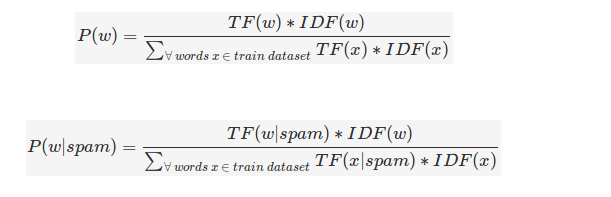




Classification: CountVectorizer uses the bag of words technique


In [0]:
# TFidf Vectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer
# here n_gram(1,3)displays sequence in which combination of words can occur
#tfidf_vec =TfidfVectorizer(max_features=5000,ngram_range=(1,3))
#x=tfidf_vec.fit_transform(corpus).toarray()

    use either of the preprocessing techniques for sentimental analysis and spam we prefer  countvectorizer and for chatbot,Q/A analysis we use TfIdf.as in here we have to detect the mail is spam or not 

In [0]:
#Countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
#obtaining top frequent columns
cv= CountVectorizer(max_features= 5000)
x=cv.fit_transform(corpus).toarray() #used to generate the matrix

In [0]:
print(corpus[3]) #check all the operations in the above list compreshension are working or not

u dun say earli hor u c alreadi say


In [0]:
x #here display of the matrix formed

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
y=pd.get_dummies(mails['label'])
y=y.iloc[:,1].values

In [0]:
print(y) #dependent variable 

[0 0 1 ... 0 0 0]


Train_Test_Spliting

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [0]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20, random_state=0)

In [0]:
#plot for confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
#prediction scores
def all_scores(model):
  predict= model.predict(x_test)
  print("testing accuracy:",accuracy_score(y_test,predict))
  print("training accuracy:",accuracy_score(y_train,model.predict(x_train)))
  print('Confusion Matric:\n',confusion_matrix(y_test,predict))
  print("Classification report:\n",classification_report(y_test,predict))
  #for the confusion_matrix plot generation
  print('Plot for Confusion_matrix:\n',plot_confusion_matrix(confusion_matrix(y_test,predict), classes=['FAKE', 'REAL']))

MultinomialNB Algorithm

In [0]:
from sklearn.naive_bayes import MultinomialNB
import itertools

testing accuracy: 0.9847533632286996
training accuracy: 0.9910253533767108
Confusion Matric:
 [[938  11]
 [  6 160]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       949
           1       0.94      0.96      0.95       166

    accuracy                           0.98      1115
   macro avg       0.96      0.98      0.97      1115
weighted avg       0.99      0.98      0.98      1115

Confusion matrix, without normalization
Plot for Confusion_matrix:
 None


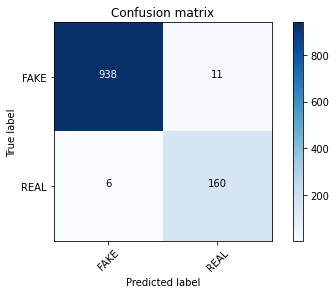

In [0]:
model= MultinomialNB()
model.fit(x_train,y_train)
all_scores(model)
#noticed that the type I and II error are relatively smaller